# Regression with `sklearn`

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

## Data Setup

In [3]:
wine = pd.read_csv('data/wine.csv')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
wine_preds = wine.drop('quality', axis=1)
wine_target = wine['quality']

## Scale the Data

In [5]:
wine_preds_scaled = (wine_preds - wine_preds.mean()) / wine_preds.std(ddof=0)

In [6]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

In [7]:
# Now we'll apply it to our data by using the .fit() and .transform() methods.
ss.fit(wine_preds)

StandardScaler()

In [8]:
wine_preds_st_scaled = ss.transform(wine_preds)

wine_preds_st_scaled

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416,  1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813,  1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813,  1.75018984],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416, -0.57136659],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 , -0.57136659],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202, -0.57136659]])

In [9]:
# Check that the scaling worked about the same as when we did it by hand
np.allclose(wine_preds_st_scaled, wine_preds_scaled)

True

In [10]:
wine_preds_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_wine
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1.75019
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,1.75019
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,1.75019
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,1.75019
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1.75019


In [11]:
wine_preds_st_scaled[:5, :]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416,  1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813,  1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813,  1.75018984],
       [ 3.07381662, -0.36243847,  1.66108525, -0.7447781 ,  0.54141159,
        -0.76207424, -0.98632406,  1.10169412, -0.3638682 ,  0.32751041,
        -0.58006813,  1.75018984],
       [ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416,  1.75018984]])

## Fit the Model

Now we can fit a `LinearRegression` object to our training data!

In [12]:
# Now we can fit a LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(wine_preds_st_scaled, wine_target)

LinearRegression()

In [13]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

array([ 0.11027401, -0.24568548, -0.00909927,  0.29704168, -0.02652718,
        0.08762284, -0.07927578, -0.311567  ,  0.08018737,  0.10739154,
        0.26556038,  0.155642  ])

In [15]:
# Can zip this with zip(df.columns, model.coef_)

In [14]:
lr.intercept_

5.818377712790517

In [16]:
lr.score(wine_preds_st_scaled, wine_target)

0.29653465192890527

In [17]:
wine_target

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [18]:
y_hat = lr.predict(wine_preds_st_scaled)
y_hat

array([4.9711381 , 4.91138099, 5.03013256, ..., 5.3914881 , 6.45904385,
       6.24475934])

All that's left is to evaluate our model to see how well it did!

## Evaluate Performance

### Observing Residuals

We can check the residuals like we would for a simple linear regression model.

In [19]:
y_hat = lr.predict(wine_preds_st_scaled)
resid = (wine_target - y_hat)

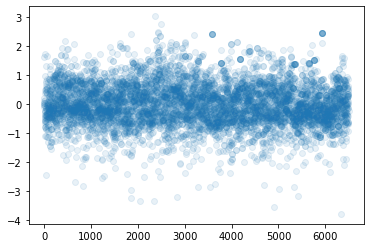

In [20]:
fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

### Sklearn Metrics

The metrics module in sklearn has a number of metrics that we can use to measure the accuracy of our model, including the $R^2$ score, the mean absolute error and the mean squared error. Note that the default 'score' on our model object is the $R^2$ score. Let's go back to our wine dataset:

In [21]:
metrics.r2_score(wine_target, lr.predict(wine_preds_st_scaled))

0.29653465192890527

Let's make sure this metric is properly calibrated. If we put simply $\bar{y}$ as our prediction, then we should get an $R^2$ score of *0*. And if we predict, say, $\bar{y} + 1$, then we should get a *negative* $R^2$ score.

In [22]:
avg_quality = np.mean(wine_target)
num = len(wine_target)

In [23]:
metrics.r2_score(wine_target, avg_quality * np.ones(num))

0.0

In [24]:
metrics.r2_score(wine_target, (avg_quality + 1) * np.ones(num))

-1.31154869162707

**MEAN ABSOLUTE ERROR INSTEAD OF R2**, if this number is decreasing after each model, your model is improving.

In [25]:
metrics.mean_absolute_error(wine_target, lr.predict(wine_preds_st_scaled))

0.568537539040229

In [26]:
metrics.mean_squared_error(wine_target, lr.predict(wine_preds_st_scaled))

0.5363623573886502

# Level Up: Deeper Evaluation of Wine Data Predictions

One thing we could have investigated from our [model on the Wine Data](#Multiple-Regression-in-Scikit-Learn) is how our predictions $\hat{y}$ match with the actual target values.

In [ ]:
sns.histplot(y_hat,kde=True,fill=False,stat='density',color='red')
sns.histplot(wine_target,discrete=True,stat='density')

So there's a slight issue with our model; the linear regression believes the target values are on a continuum. We know that's not true from the data. 

An easy fix is to round the target values.

In [ ]:
y_hat_rounded = np.round(y_hat)
np.unique(y_hat_rounded, return_counts=True)

In [ ]:
metrics.mean_squared_error(wine_target, y_hat_rounded)

Plotting the distribution is a lot more meaningful if we require targets to be integers.

In [ ]:
sns.histplot(np.round(y_hat),fill=False,discrete=True,stat='density',color='red')
sns.histplot(wine_target,discrete=True,alpha=0.3,stat='density')

Note that our $R^2$ metric will be worse. This makes sense since we found a "line of best fit" that predicts continuous values. 

If the better option was _integer_ predictions, it would have predicted that instead. 

In [ ]:
metrics.r2_score(wine_target, y_hat_rounded)

You must decide yourself if this is worth doing or if a different model makes more sense (we'll see more models in future lectures).

# Level Up: Regression with Categorical Features with the Comma Dataset

In [ ]:
commas = pd.read_csv('../data/comma-survey.csv')

In [ ]:
commas.head()

In [ ]:
ohe = OneHotEncoder(drop='first').fit(comma_df.drop('RespondentID', axis=1))

In [ ]:
comma_df = pd.DataFrame(ohe.transform(comma_df.drop('RespondentID', axis=1)).todense(),
                       columns=ohe.get_feature_names())

In [ ]:
comma_df.columns

In [ ]:
# We'll try to predict the first column of df: the extent to which
# the person accepts the sentence
# without the Oxford comma as more grammatically correct.

comma_target = comma_df['x0_It\'s important for a person to be honest, kind, and loyal.']

comma_predictors = comma_df[['x8_30-44',
       'x8_45-60', 'x8_> 60', 'x9_$100,000 - $149,999',
       'x9_$150,000+', 'x9_$25,000 - $49,999', 'x9_$50,000 - $99,999']]

comma_lr = LinearRegression()

comma_lr.fit(comma_predictors, comma_target)

comma_lr.score(comma_predictors, comma_target)

In [ ]:
comma_lr.coef_

In [ ]:
comma_df.corr()['x0_It\'s important for a person to be honest, kind, and loyal.']